In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xs = np.array(range(1,11)) # voltage
ys = np.array([3,5,7,9,11,13,15,17,19.5,21.5]) # length

assert(len(xs) == len(ys))

In [3]:
x_sigma_syst = 0.05
x_sigma = x_sigma_syst

In [4]:
result = ys / xs

In [5]:
mean_y = sum(ys) / len(ys)
mean_x = sum(xs) / len(xs)
mean_xy = sum(xs * ys) / len(xs)
mean_x_squared = sum(xs**2) / len(xs)
mean_y_squared = sum(ys**2) / len(xs)

k = (mean_xy - mean_x * mean_y) / (mean_x_squared - mean_x**2)
c = mean_y - k * mean_x;

k_sigma = (((mean_y_squared - mean_y ** 2) / (mean_x_squared - mean_x ** 2) - k**2) / len(xs))**0.5
c_sigma = k_sigma * (mean_x_squared - mean_x ** 2)

approximation_xs = np.linspace(min(xs) - 1, max(xs) + 1)
approximation_ys = k * approximation_xs + c

y_sigma_syst = 2 * 0.5 / (max(xs) - min(xs))
y_sigma = ((sum((k * xs + c - ys)**2) / len(ys))**2 + y_sigma_syst**2)**0.5

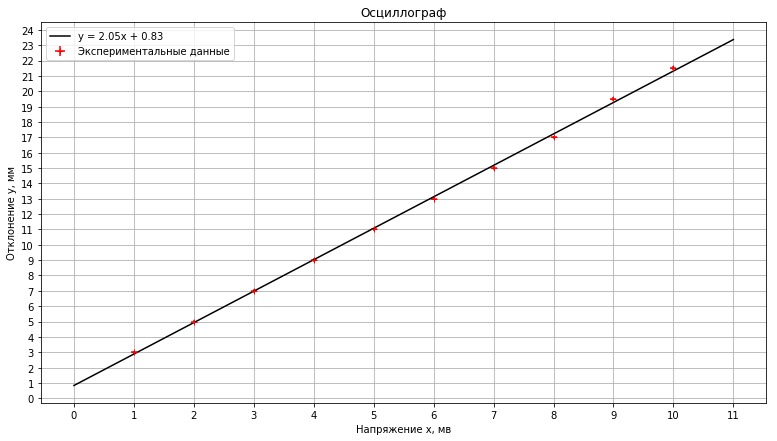

In [6]:
plt.gcf().set_size_inches(13, 7)
axes = plt.axes()
axes.set_title("Осциллограф")
axes.set_xlabel("Напряжение x, мв")
axes.set_ylabel("Отклонение y, мм")
plt.locator_params(nbins=20, axis='x')
plt.locator_params(nbins=40, axis='y')
plt.grid(True)
plt.plot(approximation_xs, approximation_ys, 'k-')
plt.errorbar(xs, ys, y_sigma, x_sigma, fmt='r+')
plt.legend(["y = {k:.2f}x + {c:.2f}".format(k=k, c=c), "Экспериментальные данные"]);

In [7]:
sigma_full = (x_sigma_syst**2 + y_sigma_syst**2 + k_sigma**2)**0.5
print("δ = {:.2f}±{:.2f} м/В ({:.2f}% error)".format(k, sigma_full, 100 * sigma_full / k))

δ = 2.05±0.12 м/В (6.00% error)
